# Exploratory Data Analysis 
# Digital Assignment

#### NAME: PRIYANSU NAYAK
#### REG NUM: 21BDS0075

##### GITHUB REPO LINK: https://github.com/Priyansux2003/BodyPerformance

Load the Dataset and explore Dimension, Summary, Data Handling, Data Cleaning, Univariate, Bivariate and Multivariate Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('bodyPerformance.csv')

# Dimensions and summary
print("Dimensions:", data.shape)
print("Summary:")
print(data.describe(include='all'))

# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Dimensions: (13393, 12)
Summary:
                 age gender     height_cm     weight_kg    body fat_%  \
count   13393.000000  13392  13393.000000  13393.000000  13392.000000   
unique           NaN      2           NaN           NaN           NaN   
top              NaN      M           NaN           NaN           NaN   
freq             NaN   8466           NaN           NaN           NaN   
mean       36.775106    NaN    168.559807     67.447316     23.240258   
std        13.625639    NaN      8.426583     11.949666      7.257107   
min        21.000000    NaN    125.000000     26.300000      3.000000   
25%        25.000000    NaN    162.400000     58.200000     18.000000   
50%        32.000000    NaN    169.200000     67.400000     22.800000   
75%        48.000000    NaN    174.800000     75.300000     28.000000   
max        64.000000    NaN    193.800000    138.100000     78.400000   

           diastolic      systolic     gripForce  sit and bend forward_cm  \
count   13393

#### Handling missing values

In [3]:
# Handling missing values without using inplace=True
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['body fat_%'] = data['body fat_%'].fillna(data['body fat_%'].mean())
data['systolic'] = data['systolic'].fillna(data['systolic'].mean())

# Verify missing values handled
print("Missing Values After Handling:")
print(data.isnull().sum())


Missing Values After Handling:
age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


#### Data Visualization

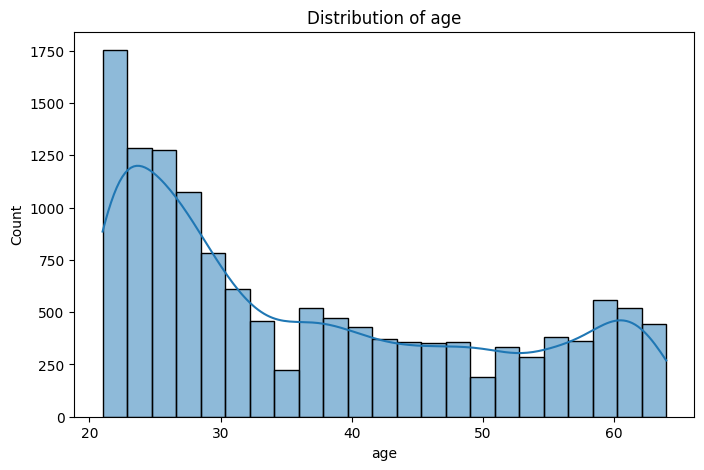

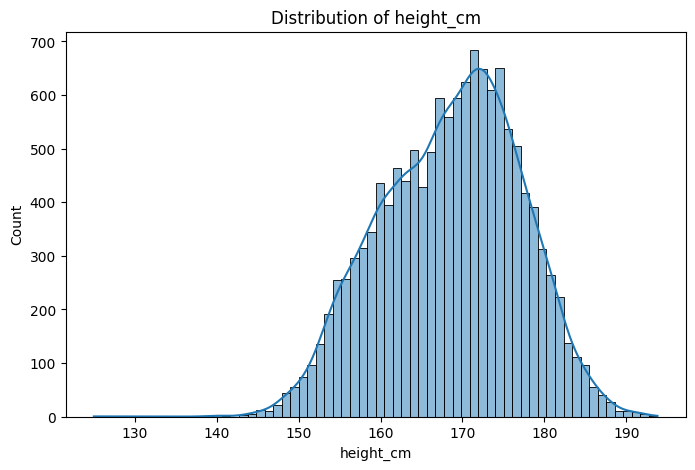

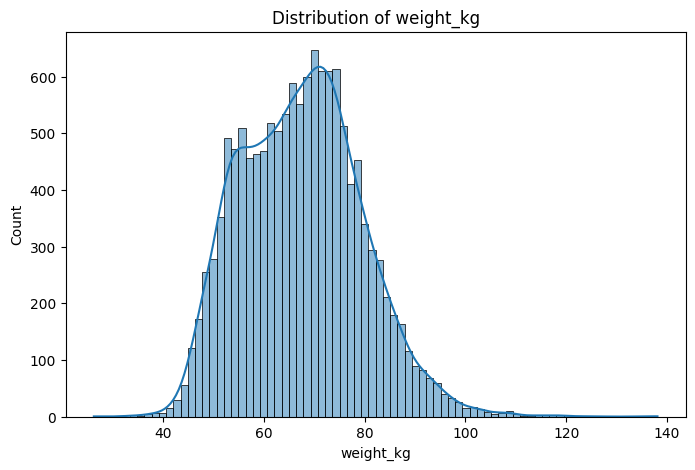

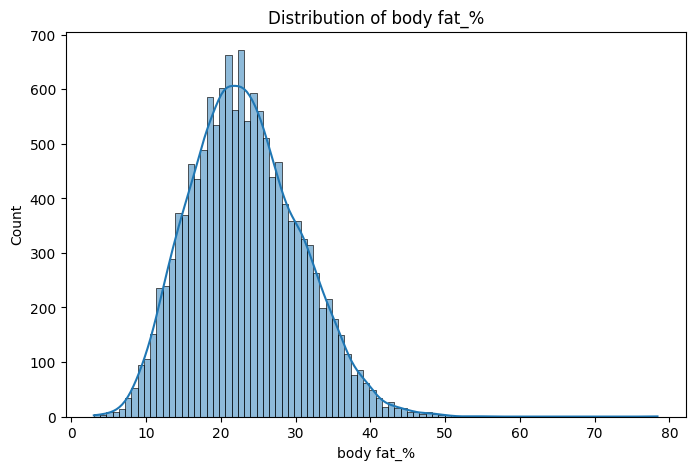

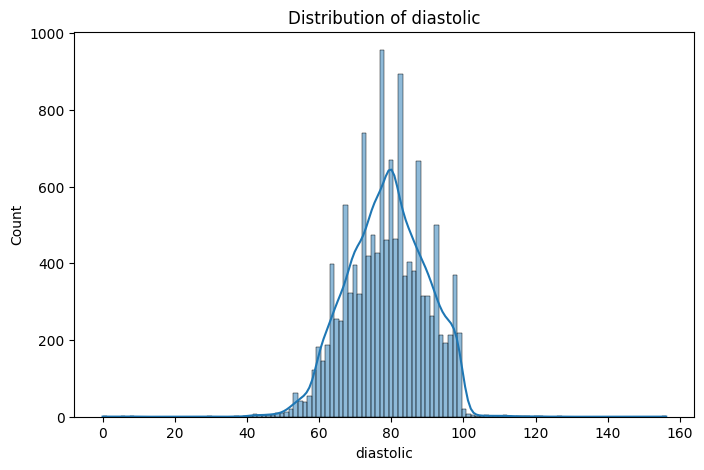

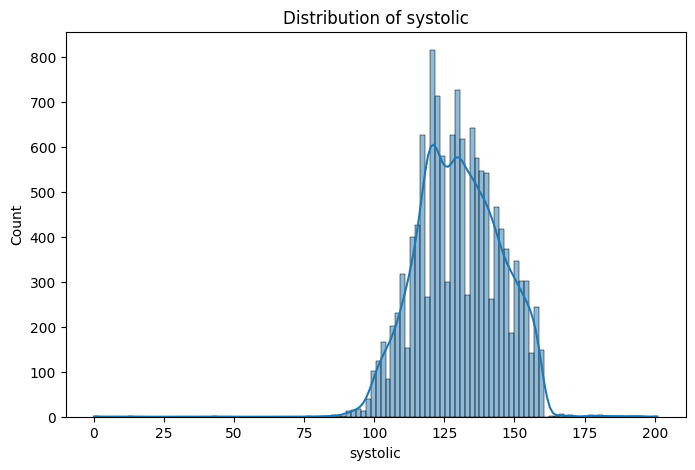

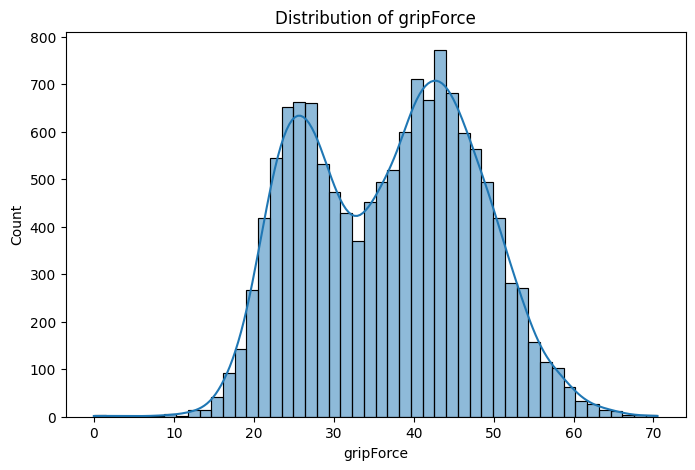

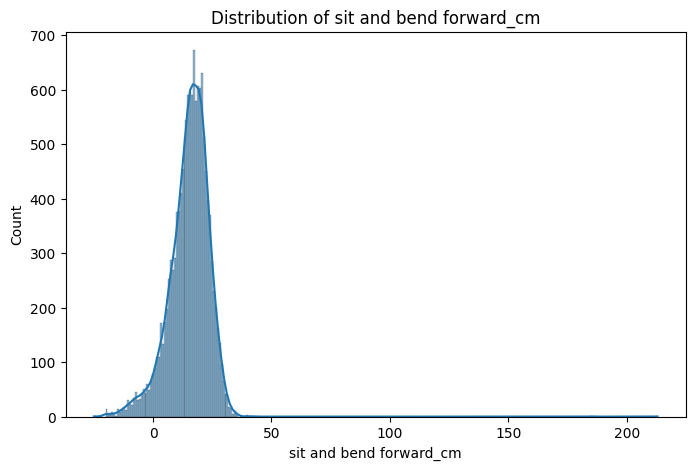

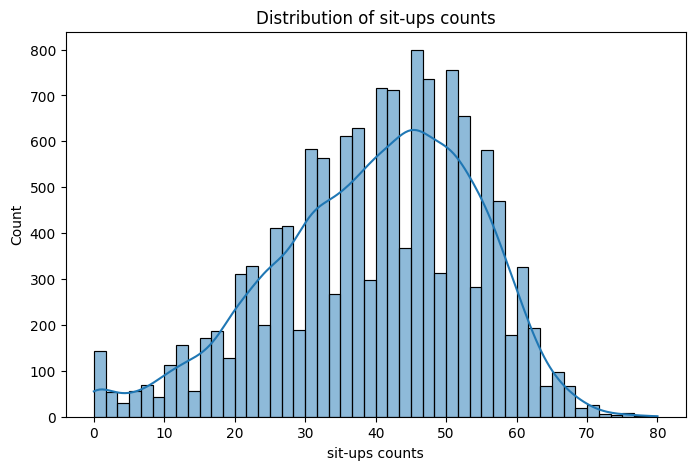

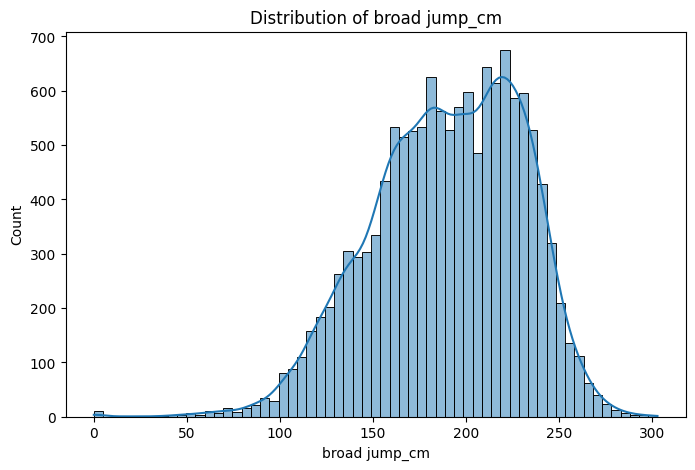

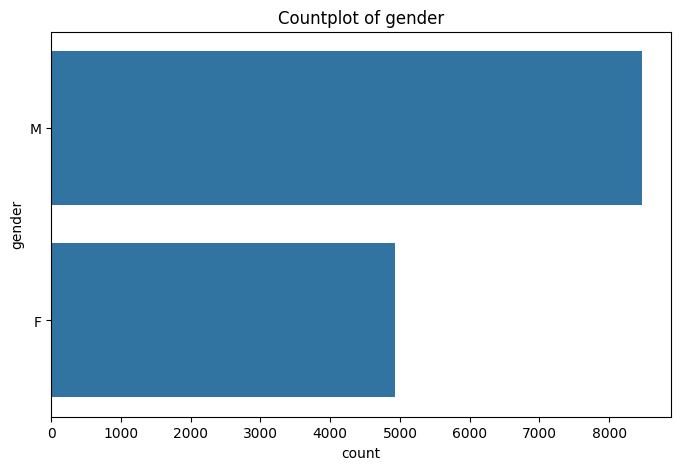

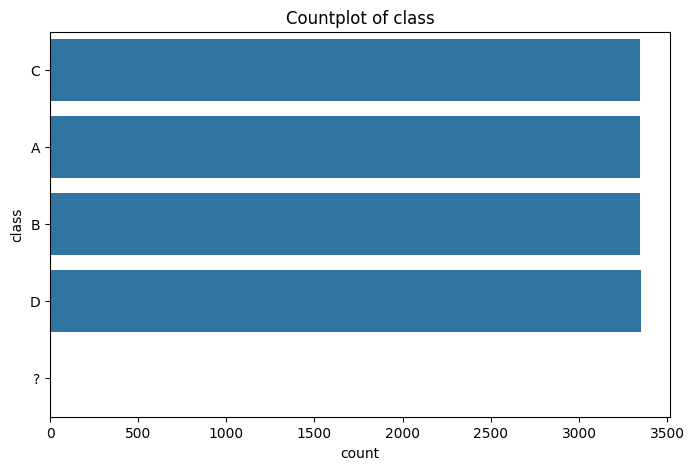

In [4]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Countplot for categorical variables
for column in data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data[column])
    plt.title(f'Countplot of {column}')
    plt.show()

C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


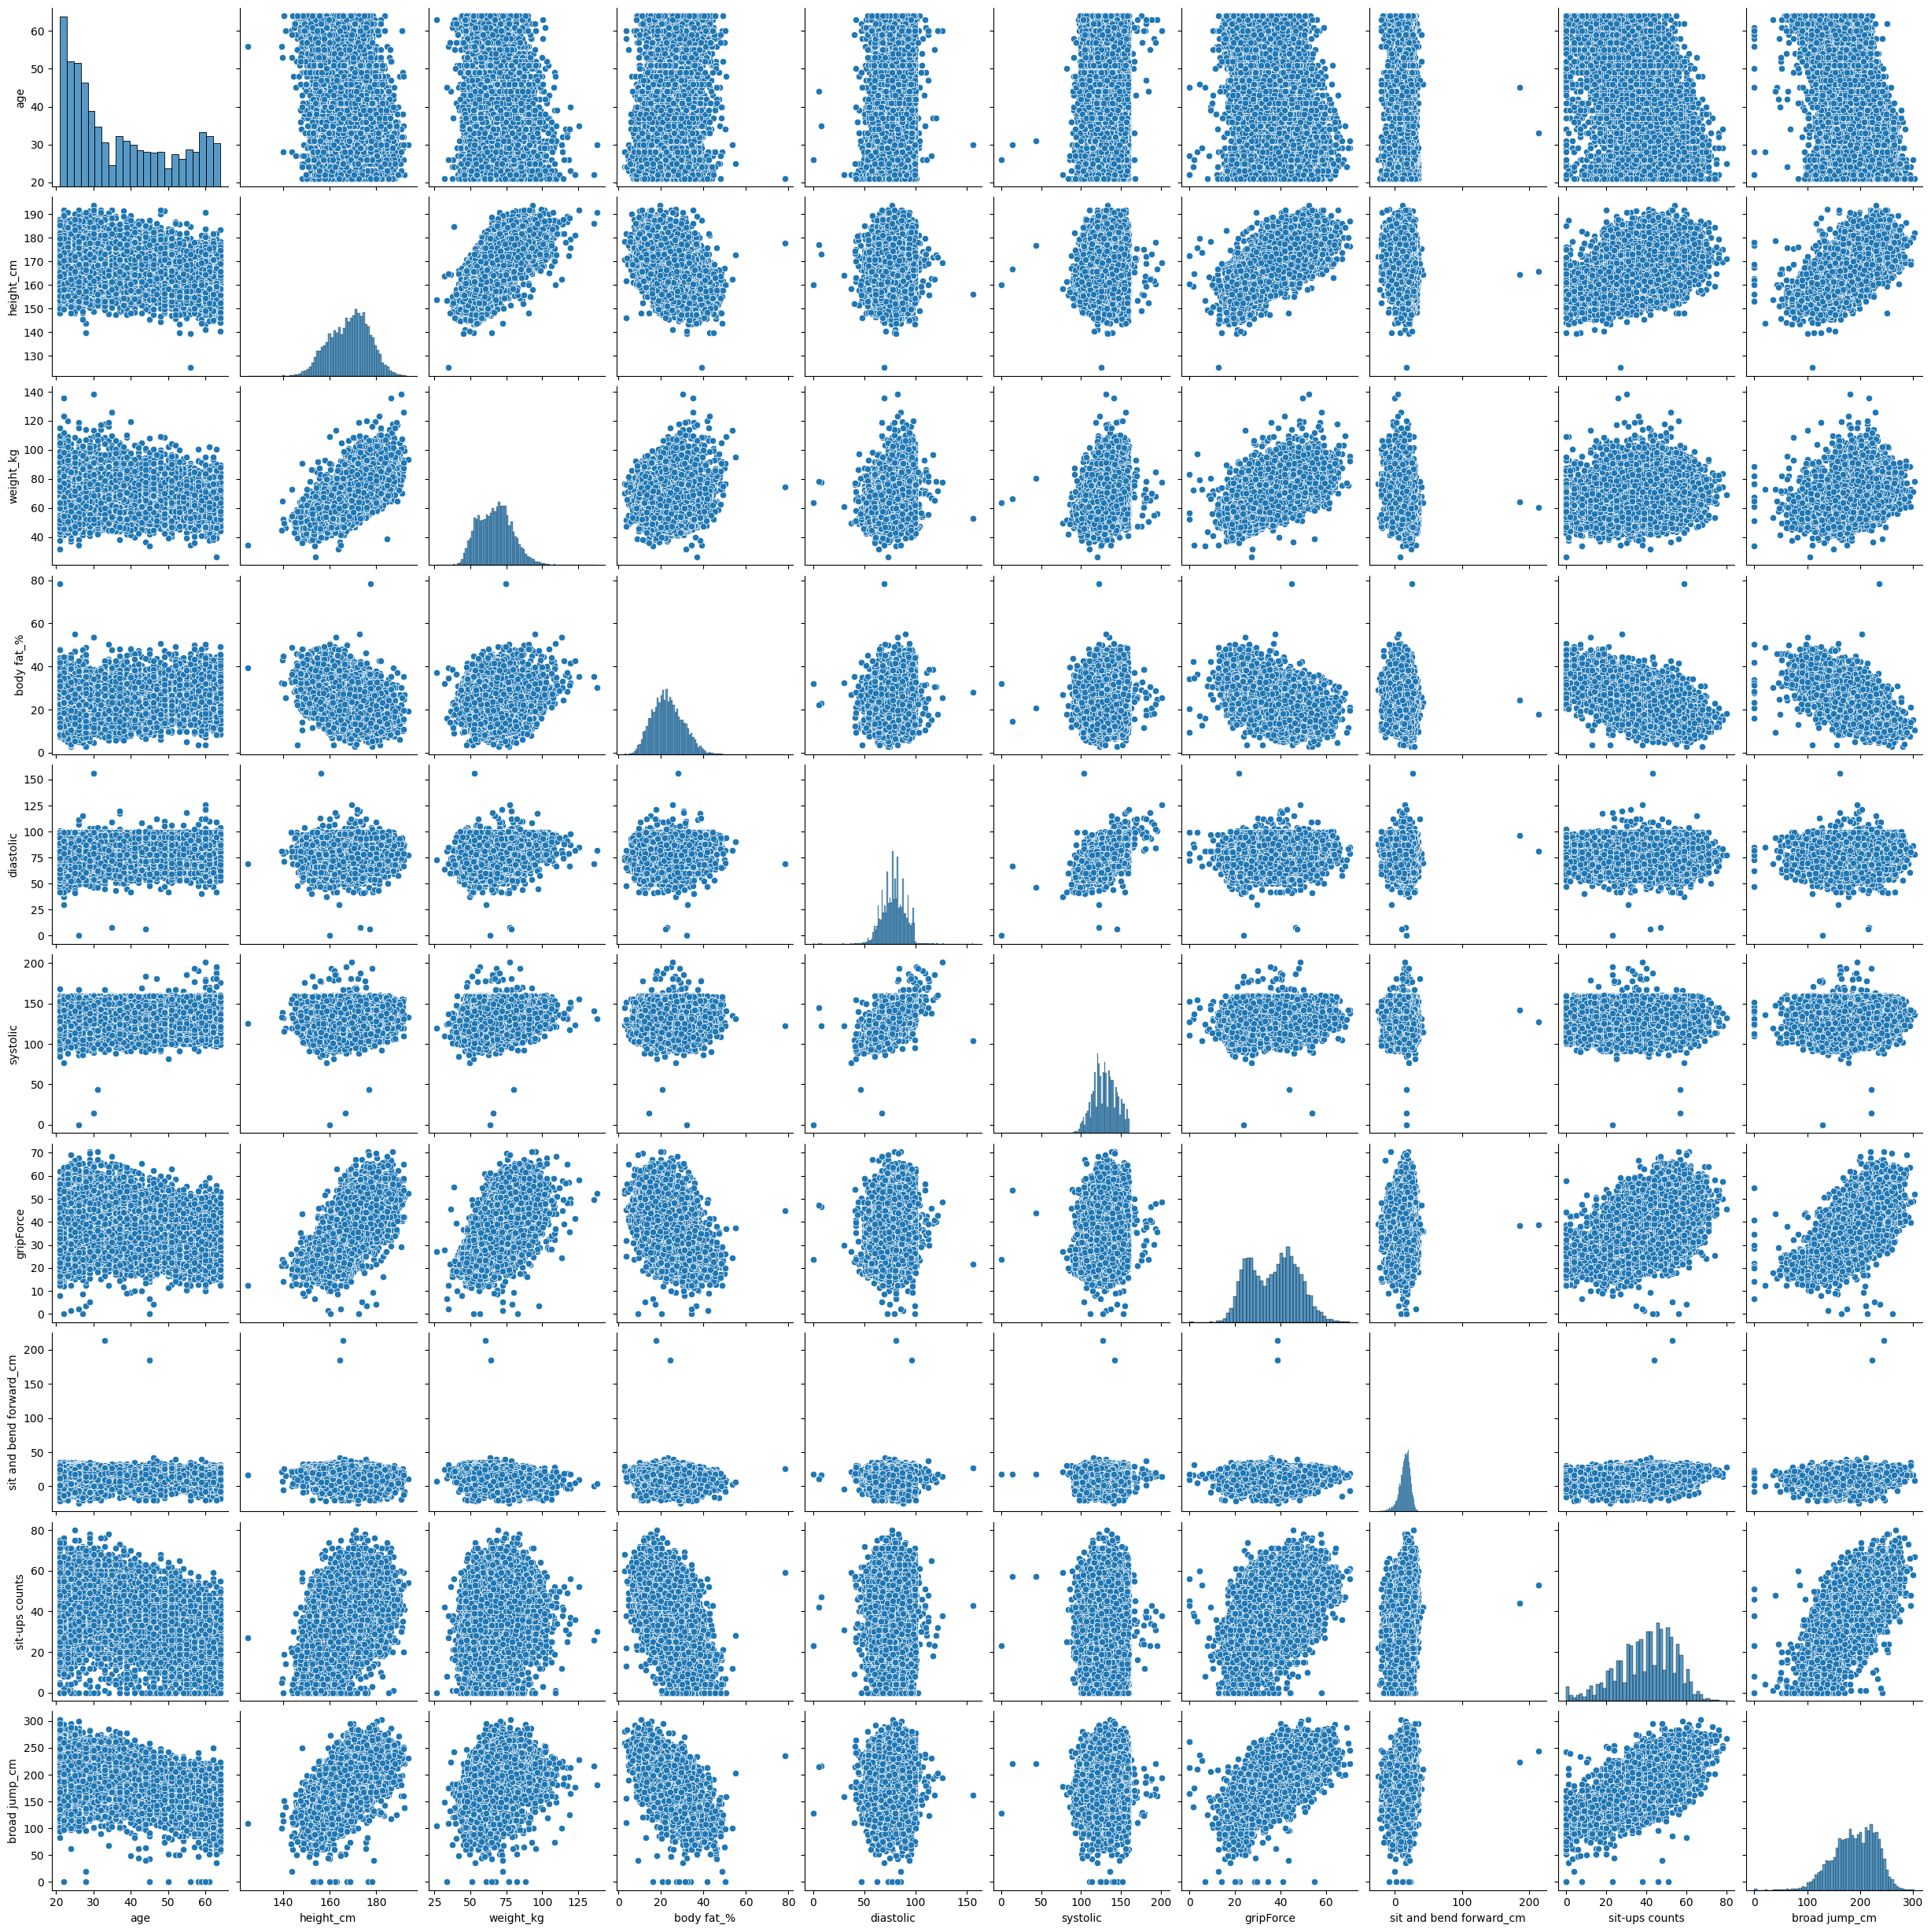

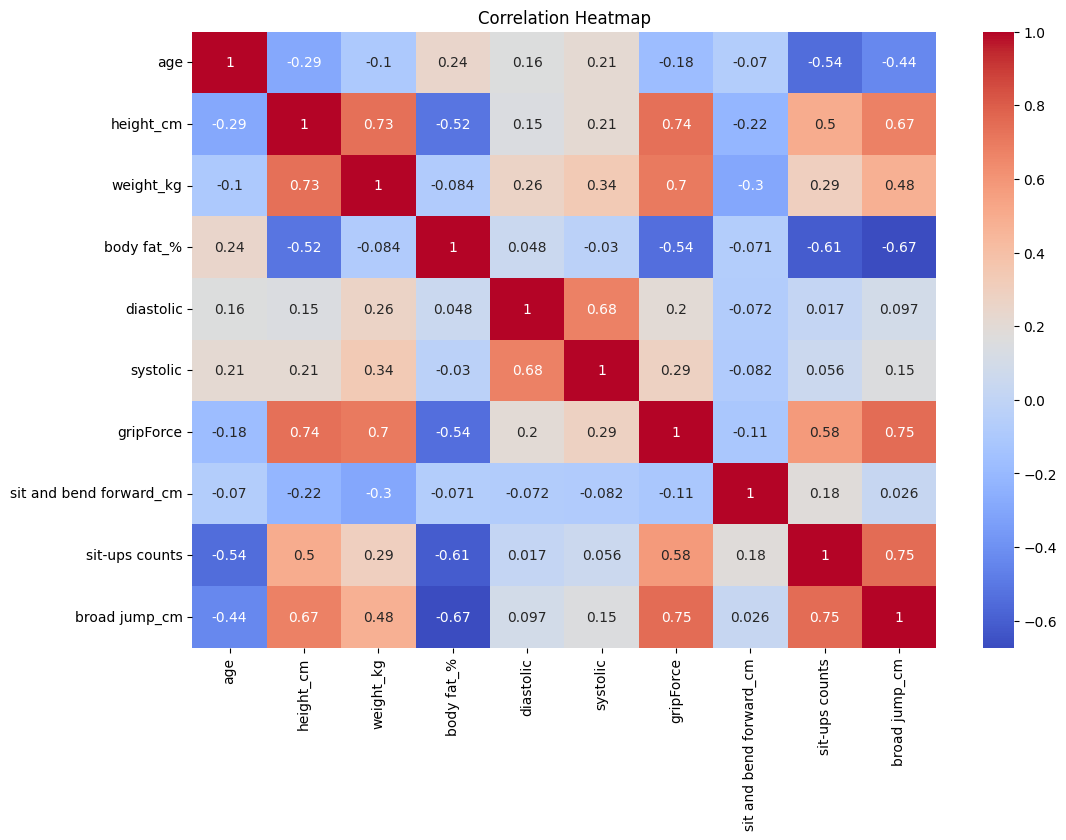

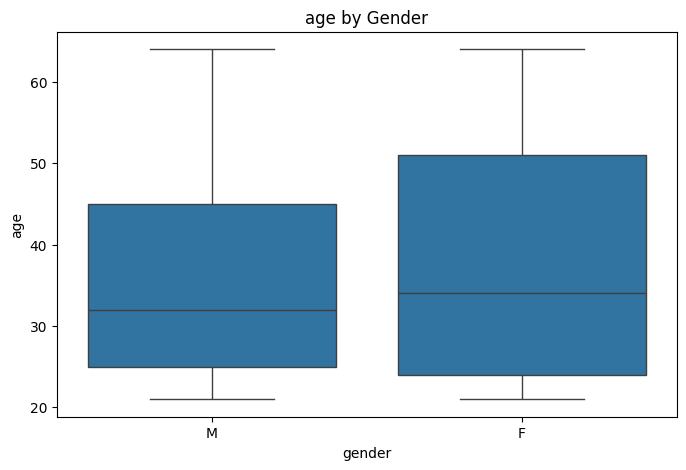

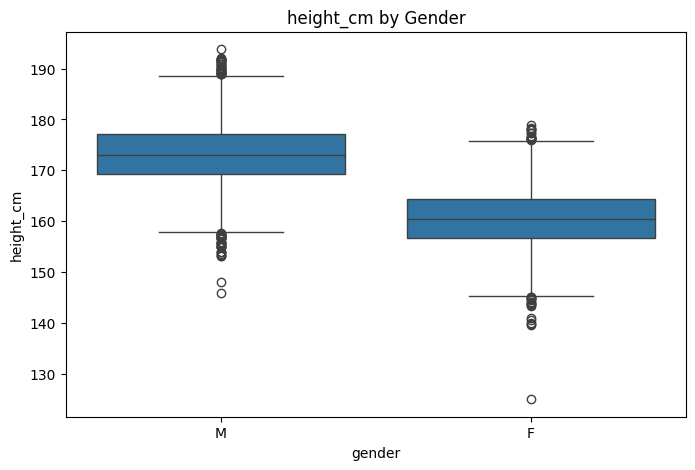

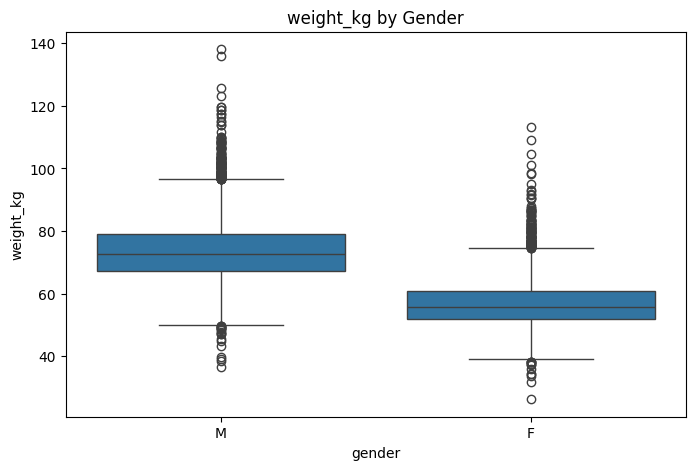

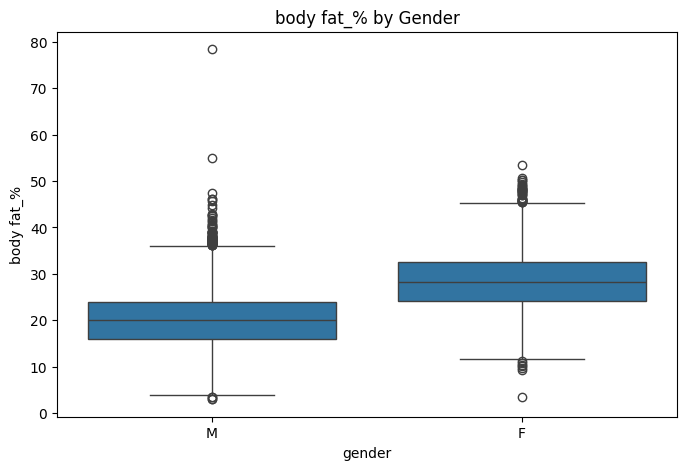

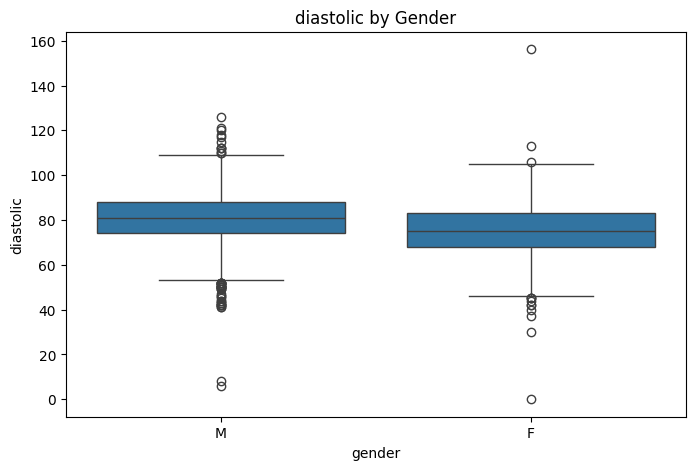

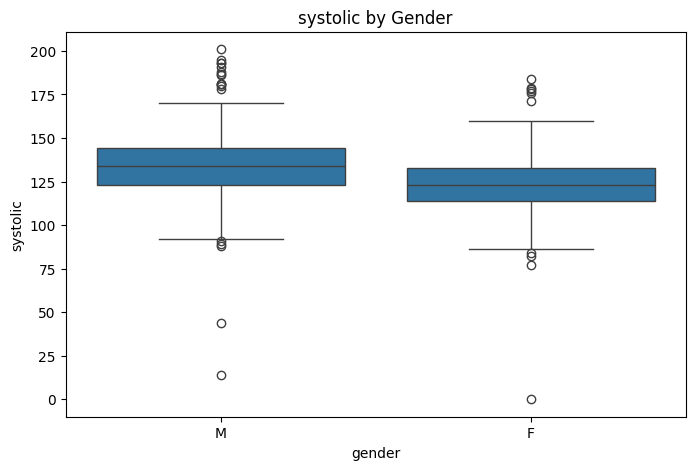

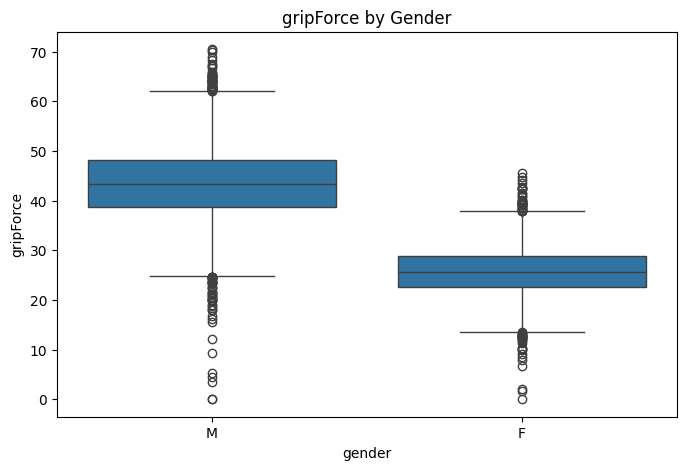

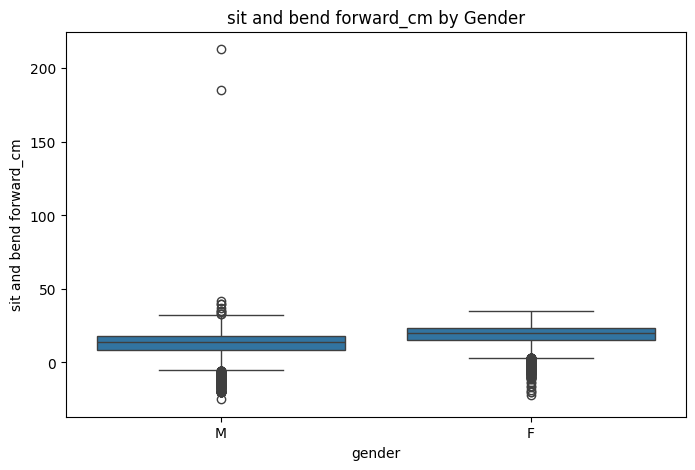

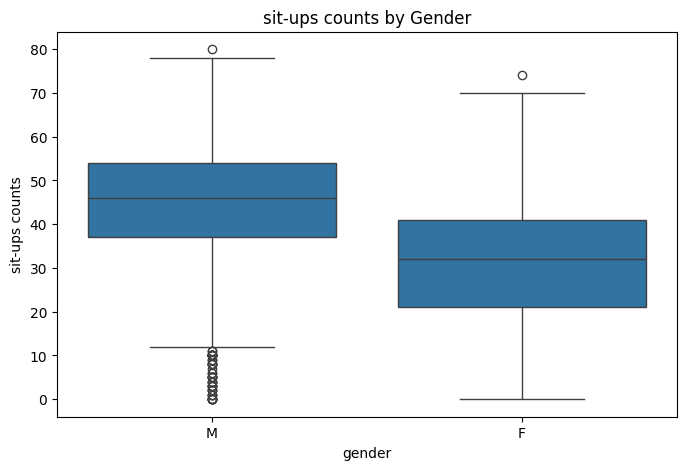

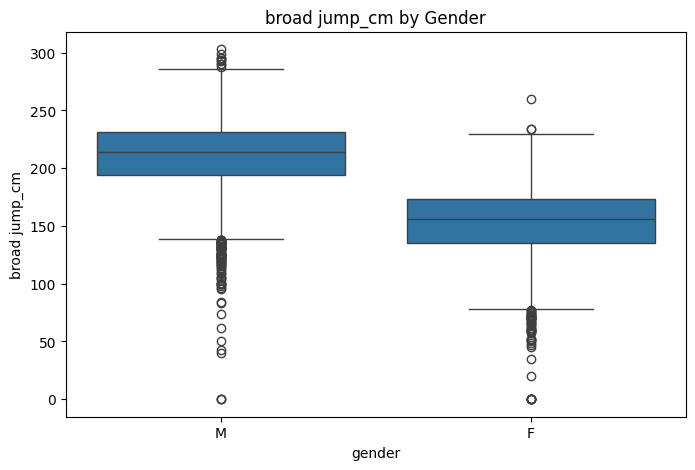

In [6]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Handle missing values
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['body fat_%'] = data['body fat_%'].fillna(data['body fat_%'].mean())
data['systolic'] = data['systolic'].fillna(data['systolic'].mean())

# Ensure all numeric columns are clean
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Step 2: Pairplot for Numeric Features
sns.pairplot(numeric_data)
plt.show()

# Step 3: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Boxplots for Gender vs Numeric Features
for column in numeric_data.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='gender', y=column, data=data)
    plt.title(f'{column} by Gender')
    plt.show()


#### Correlation Heatmap

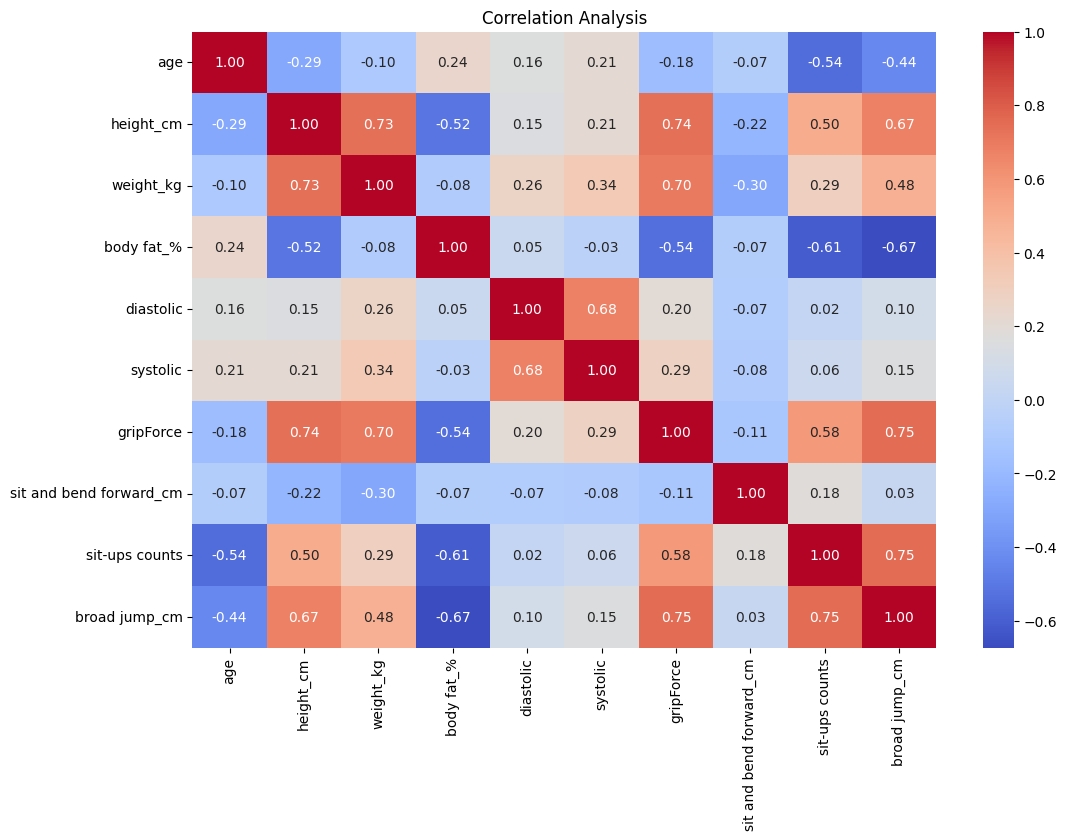

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Filter numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Step 2: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Analysis")
plt.show()


#### Data Summary

                age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240258     78.796842   
std       13.625639      8.426583     11.949666      7.256836     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13393.000000  13393.000000             13393.000000    13393.000000   
mean     130.233938     36.963877                15.209268       39.771224   
std       14.713602     10.624864                 8.45

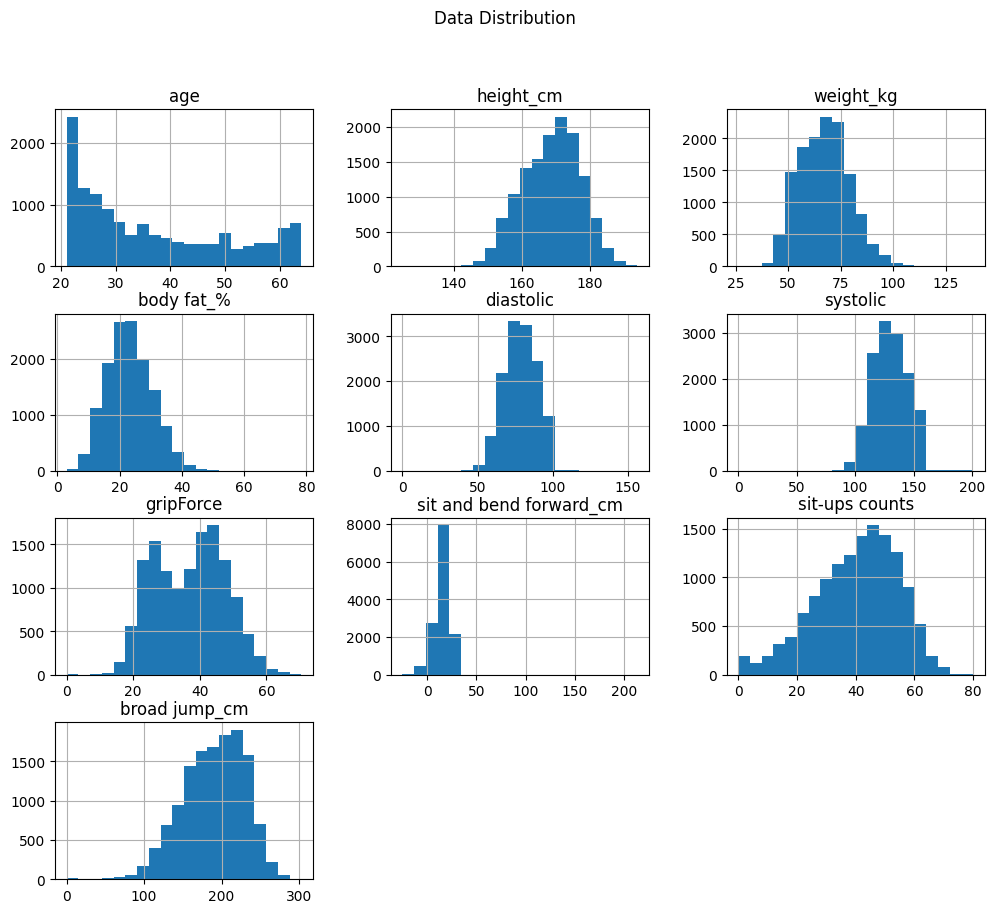

In [10]:
# Data Summary
print(data.describe())

# Visualization
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Data Distribution")
plt.show()

#### Clustering & PCA

Silhouette Score: 0.32485070888697115


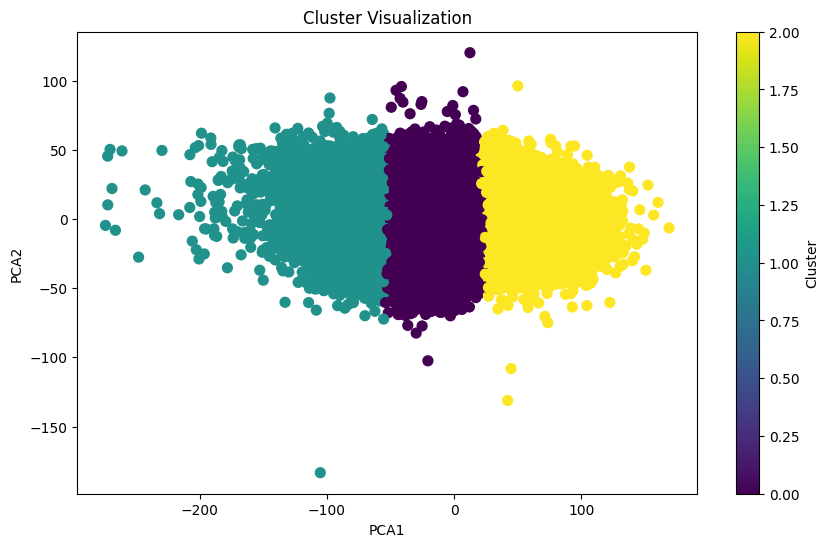

In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Selecting numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Step 1: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(numeric_data)

# Add cluster labels to data
data['Cluster'] = clusters

# Step 2: Silhouette Score
score = silhouette_score(numeric_data, clusters)
print("Silhouette Score:", score)

# Step 3: PCA for Visualization (if PCA1 and PCA2 don't already exist)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(numeric_data)

# Add PCA components to the DataFrame
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Step 4: Cluster Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='viridis', s=50)
plt.title("Cluster Visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Cluster')
plt.show()


Explained Variance Ratio: [0.79105011 0.13908539]


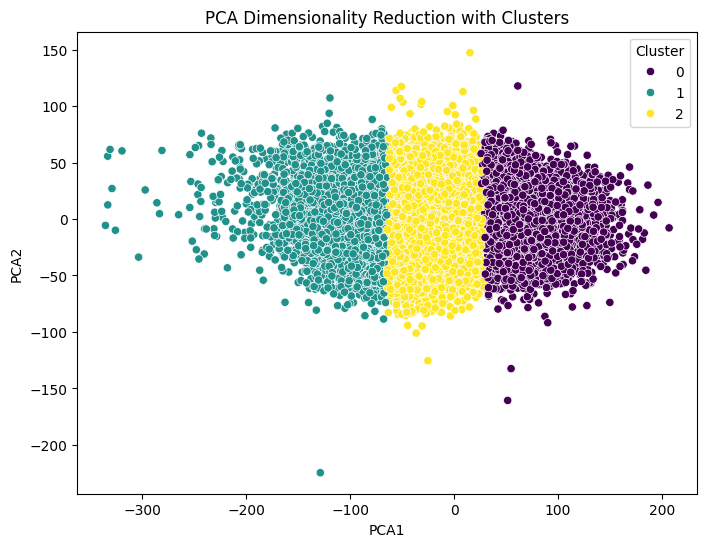

Silhouette Score: 0.344102756111162


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: Ensure numeric data
numeric_data = data.select_dtypes(include=[np.number])

# Step 2: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(numeric_data)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Step 3: PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_data)

# Add PCA results to the dataset
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# Print PCA explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Step 4: Visualization of PCA Results with Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('PCA Dimensionality Reduction with Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# Step 5: Silhouette Score
score = silhouette_score(numeric_data, clusters)
print("Silhouette Score:", score)


#### Model Building & Model Evaluation

In [21]:
# Verify and clean target column
target_column = 'class'
if target_column not in data.columns:
    raise KeyError(f"Column '{target_column}' not found in the dataset!")

# Handle invalid values (e.g., '?')
data = data[~data[target_column].isin(['?'])]

# Map string labels to integers
label_mapping = {label: idx for idx, label in enumerate(data[target_column].unique())}
data[target_column] = data[target_column].map(label_mapping)
print("Label Mapping:", label_mapping)

# Prepare features and target
numeric_data = data.select_dtypes(include=[np.number])  # Numeric features
X = numeric_data
y = data[target_column]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Increase iterations
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


Label Mapping: {'C': 0, 'A': 1, 'B': 2, 'D': 3}


C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9997511199601792
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1059
           1       1.00      1.00      1.00       985
           2       1.00      1.00      1.00       992
           3       1.00      1.00      1.00       982

    accuracy                           1.00      4018
   macro avg       1.00      1.00      1.00      4018
weighted avg       1.00      1.00      1.00      4018



Model: Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1059
           1       1.00      1.00      1.00       985
           2       1.00      1.00      1.00       992
           3       1.00      1.00      1.00       982

    accuracy                           1.00      4018
   macro avg       1.00      1.00      1.00      4018
weighted avg       1.00      1.00      1.00 

#### Correlation Network

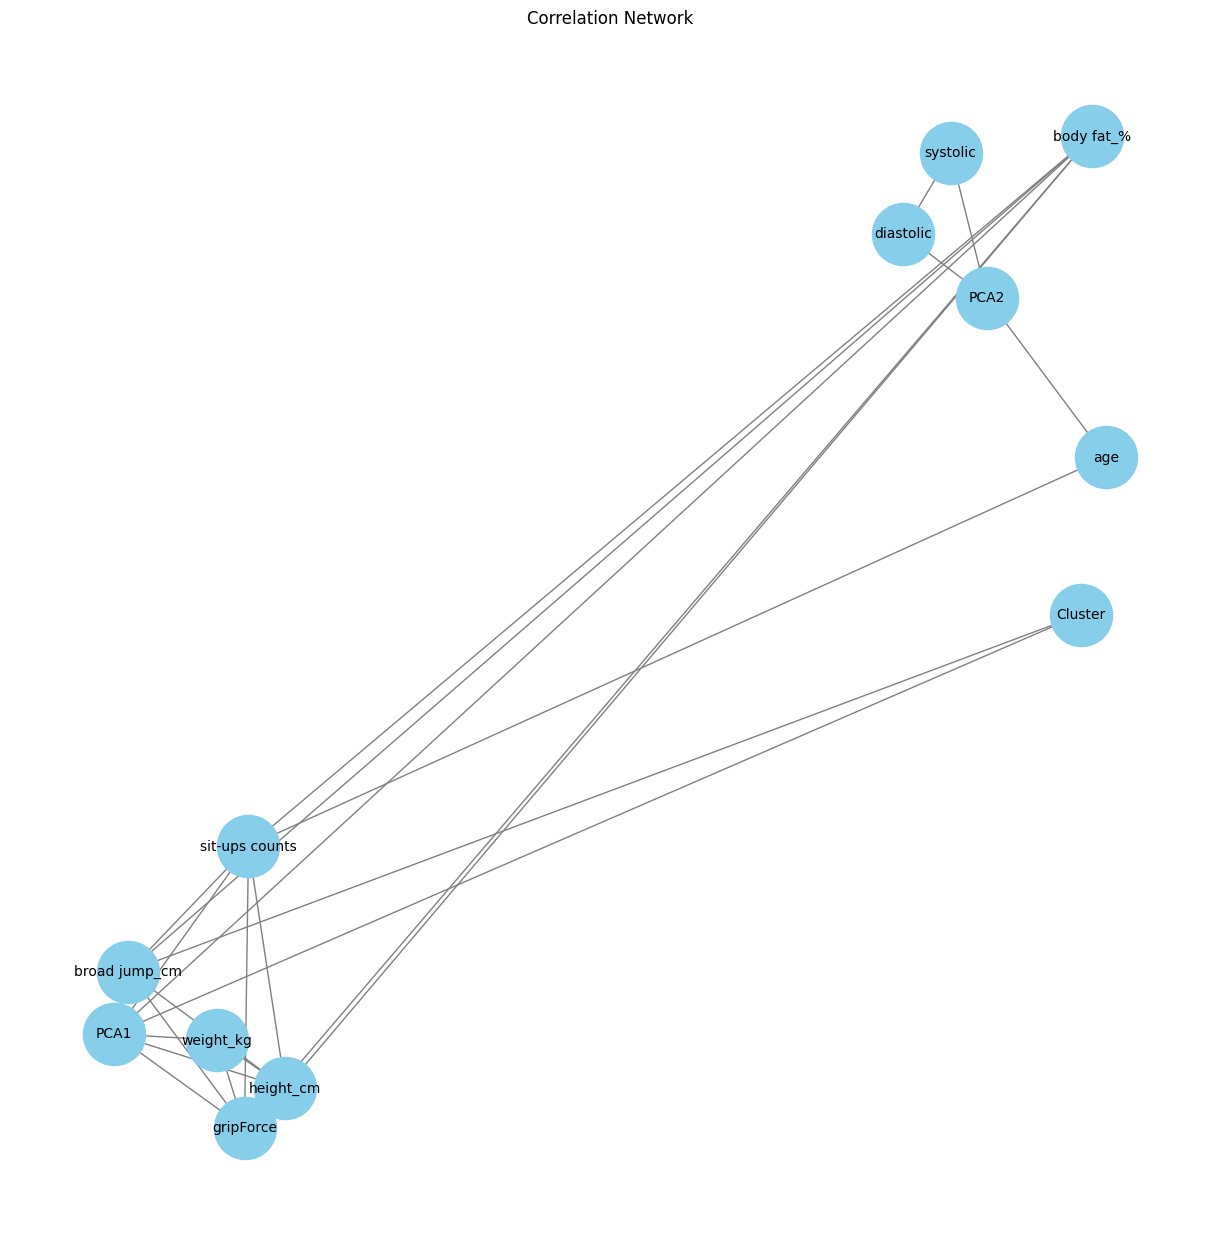

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Create a correlation matrix
correlation_matrix = numeric_data.corr()

# Create a graph based on the correlation threshold
G = nx.Graph()

# Adding edges based on correlation threshold
threshold = 0.5  # You can adjust this threshold
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if i < j and abs(correlation_matrix.iloc[i, j]) > threshold:
            G.add_edge(col1, col2, weight=correlation_matrix.iloc[i, j])

# Plot the network
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=10)
plt.title("Correlation Network")
plt.show()


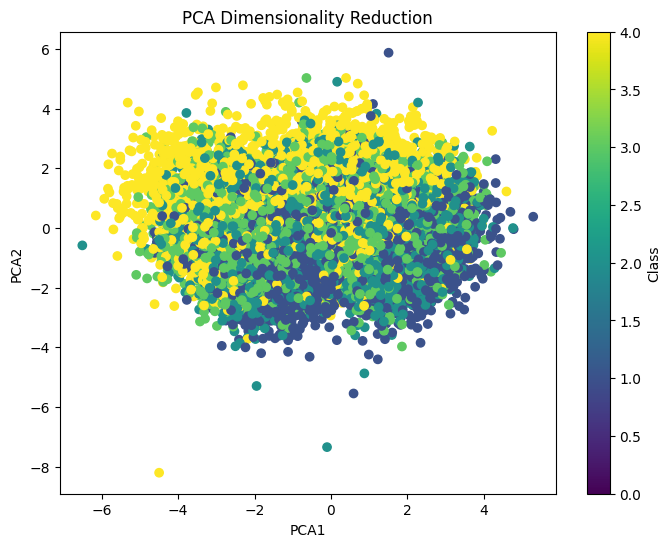

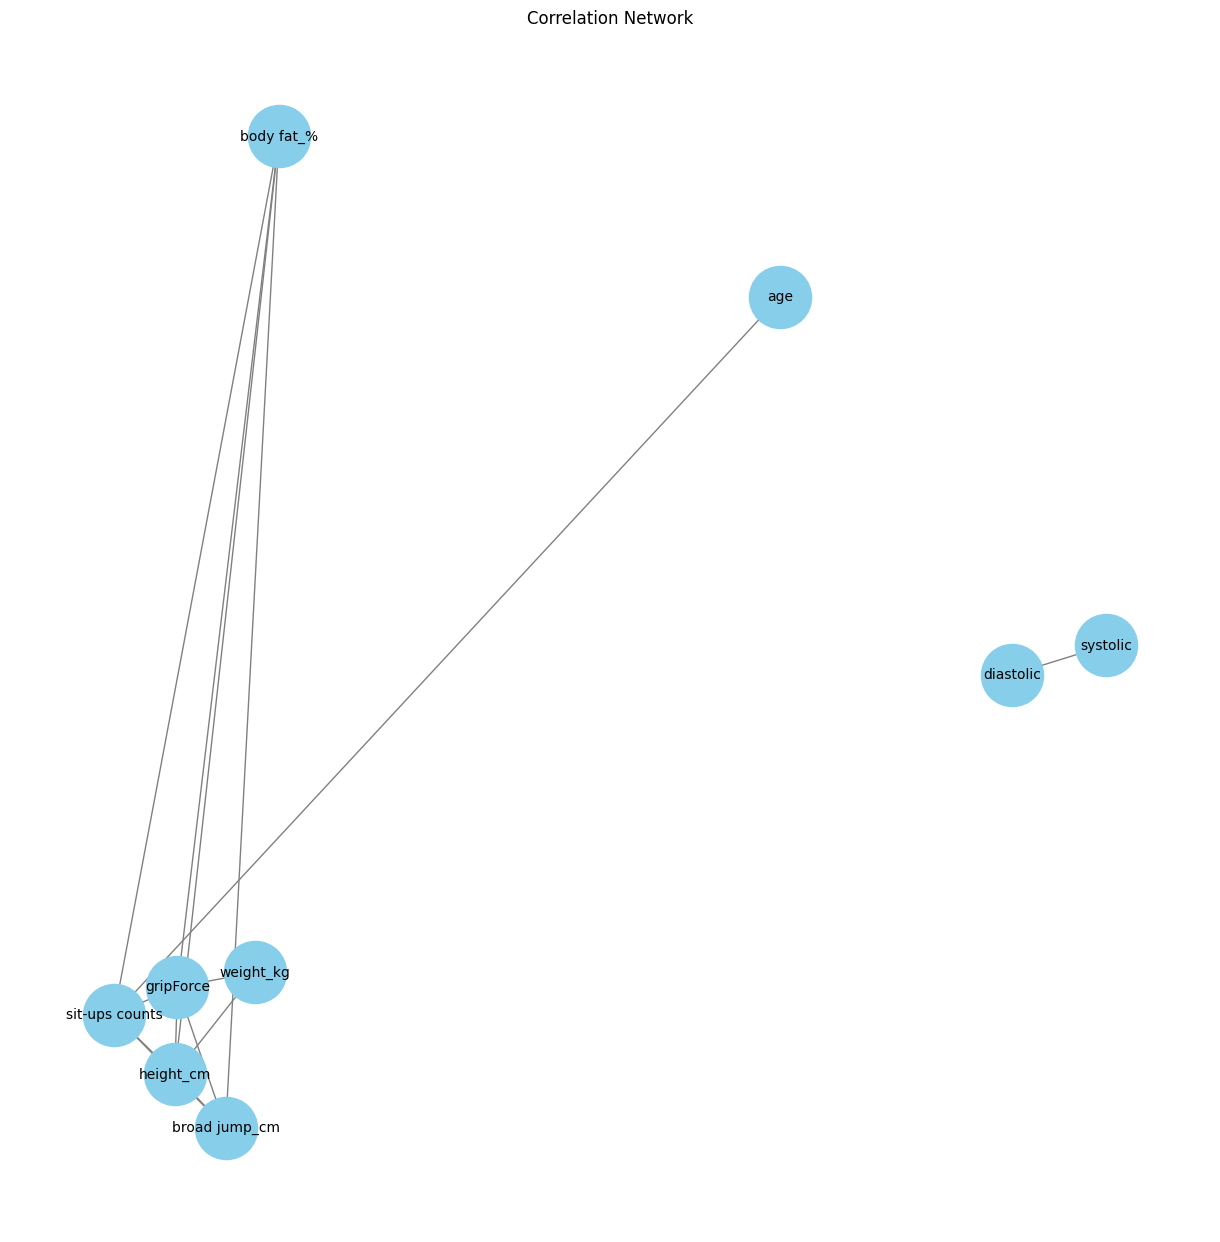

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import networkx as nx

# Load the dataset
file_path = 'bodyPerformance.csv'
data = pd.read_csv(file_path)

# Select numeric columns for analysis
numeric_data = data.select_dtypes(include=[np.number])

# Impute missing values with the mean of each column for numeric columns
imputer = SimpleImputer(strategy='mean')
data_imputed = data.copy()
data_imputed[numeric_data.columns] = imputer.fit_transform(numeric_data)

# Standardizing the imputed data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed[numeric_data.columns])

# Performing PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Adding PCA results to the data
data_imputed['PCA1'] = pca_result[:, 0]
data_imputed['PCA2'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(data_imputed['PCA1'], data_imputed['PCA2'], c=data_imputed['class'].astype('category').cat.codes, cmap='viridis')
plt.title('PCA Dimensionality Reduction')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Class')
plt.show()

# Create a correlation network for the imputed data (only numeric columns)
correlation_matrix = data_imputed[numeric_data.columns].corr()
G = nx.Graph()

# Adding edges based on correlation threshold
threshold = 0.5
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if i < j and abs(correlation_matrix.iloc[i, j]) > threshold:
            G.add_edge(col1, col2, weight=correlation_matrix.iloc[i, j])

# Plot the correlation network
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=10)
plt.title("Correlation Network")
plt.show()
